In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_14383/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
na_values = ['UNKNOWN', 'unknown', 'Unknown', 'Unknown ve', '(0.0, 0.0)', 'Unspecified']

df = pd.read_csv('crashes.csv', na_values=na_values)
df_sample = df.sample(frac=.40)

/tmp/ipykernel_14383/3558001420.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crashes.csv', na_values=na_values)


## Data exploration

In [5]:
df_sample.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
93418,10/29/2021,11:00,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unsafe Lane Changing,NaN,NaN,NaN,4477506,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN
884825,05/17/2017,13:00,BRONX,10468.0,40.871300,-73.892890,"(40.8713, -73.89289)",NaN,NaN,1 EAST 198 STREET,...,NaN,NaN,NaN,NaN,3674076,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1922099,07/07/2012,15:30,NaN,NaN,40.618983,-74.163887,"(40.6189834, -74.1638869)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3121392,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
75150,08/11/2021,17:00,NaN,NaN,NaN,NaN,NaN,454,48 street,NaN,...,NaN,NaN,NaN,NaN,4446136,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1682738,10/02/2013,13:40,QUEENS,11367,40.734195,-73.819751,"(40.734195, -73.8197507)",MELBOURNE AVENUE,150 STREET,NaN,...,NaN,NaN,NaN,NaN,237015,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831518 entries, 93418 to 1855431
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     831518 non-null  object 
 1   CRASH TIME                     831518 non-null  object 
 2   BOROUGH                        572427 non-null  object 
 3   ZIP CODE                       572327 non-null  object 
 4   LATITUDE                       737864 non-null  float64
 5   LONGITUDE                      737864 non-null  float64
 6   LOCATION                       736131 non-null  object 
 7   ON STREET NAME                 655555 non-null  object 
 8   CROSS STREET NAME              517351 non-null  object 
 9   OFF STREET NAME                139227 non-null  object 
 10  NUMBER OF PERSONS INJURED      831506 non-null  float64
 11  NUMBER OF PERSONS KILLED       831502 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED 

In [7]:
df_sample.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          259091
ZIP CODE                         259191
LATITUDE                          93654
LONGITUDE                         93654
LOCATION                          95387
ON STREET NAME                   175963
CROSS STREET NAME                314167
OFF STREET NAME                  692291
NUMBER OF PERSONS INJURED            12
NUMBER OF PERSONS KILLED             16
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1    285701
CONTRIBUTING FACTOR VEHICLE 2    720833
CONTRIBUTING FACTOR VEHICLE 3    827500
CONTRIBUTING FACTOR VEHICLE 4    830781
CONTRIBUTING FACTOR VEHICLE 5    831301
COLLISION_ID                          0
VEHICLE TYPE CODE 1               13365


In [8]:
# defining the dataset ID
df_sample.set_index('COLLISION_ID', inplace=True)

Dropping columns that have more than 25% null values

### Handling missing values and irrelevant data

In [9]:
threshold = len(df) * 0.25
df_sample.dropna(thresh=threshold, axis=1, inplace=True)

In [10]:
df_sample.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          259091
ZIP CODE                         259191
LATITUDE                          93654
LONGITUDE                         93654
LOCATION                          95387
ON STREET NAME                   175963
NUMBER OF PERSONS INJURED            12
NUMBER OF PERSONS KILLED             16
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1    285701
VEHICLE TYPE CODE 1               13365
VEHICLE TYPE CODE 2              191924
dtype: int64

Deleting logical irrelevant columns

In [11]:
df_sample.drop(['VEHICLE TYPE CODE 2', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1, inplace=True)

Simplifying feature names

In [12]:
df_sample.rename(columns={
    'CRASH DATE': 'DATE',
    'CRASH TIME': 'TIME',
    'LATITUDE': 'LAT',
    'LONGITUDE': 'LON',
    'ON STREET NAME': 'ON_STREET',
    'CROSS STREET NAME': 'CROSS_STREET',
    'NUMBER OF PERSONS INJURED': 'INJURED',
    'NUMBER OF PERSONS KILLED': 'KILLED',
    'NUMBER OF PEDESTRIANS INJURED': 'PED_INJURED',
    'NUMBER OF PEDESTRIANS KILLED': 'PED_KILLED',
    'NUMBER OF CYCLIST INJURED': 'CY_INJURED',
    'NUMBER OF CYCLIST KILLED': 'CY_KILLED',
    'NUMBER OF MOTORIST INJURED': 'MOT_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOT_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR',
    'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR2',
    'VEHICLE TYPE CODE 1': 'VEHICLE'
    }, inplace=True)

#### Cleaning the target variable

Dropping all raws with null in the target varible

In [13]:
df_sample.dropna(subset=['VEHICLE'], inplace=True)

df_sample.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
INJURED        float64
KILLED         float64
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

Finding and excluding outliers

In [14]:
df_sample.describe()

,INJURED,KILLED,PED_INJURED,PED_KILLED,CY_INJURED,CY_KILLED,MOT_INJURED,MOT_KILLED
count,818142.000000,818137.000000,818153.000000,818153.000000,818153.000000,818153.000000,818153.000000,818153.000000
mean,0.306872,0.001426,0.051064,0.000713,0.026478,0.000095,0.225859,0.000596
std,0.701353,0.038984,0.232301,0.026913,0.162534,0.009764,0.665467,0.025779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.000000,4.000000,13.000000,2.000000,4.000000,1.000000,34.000000,3.000000


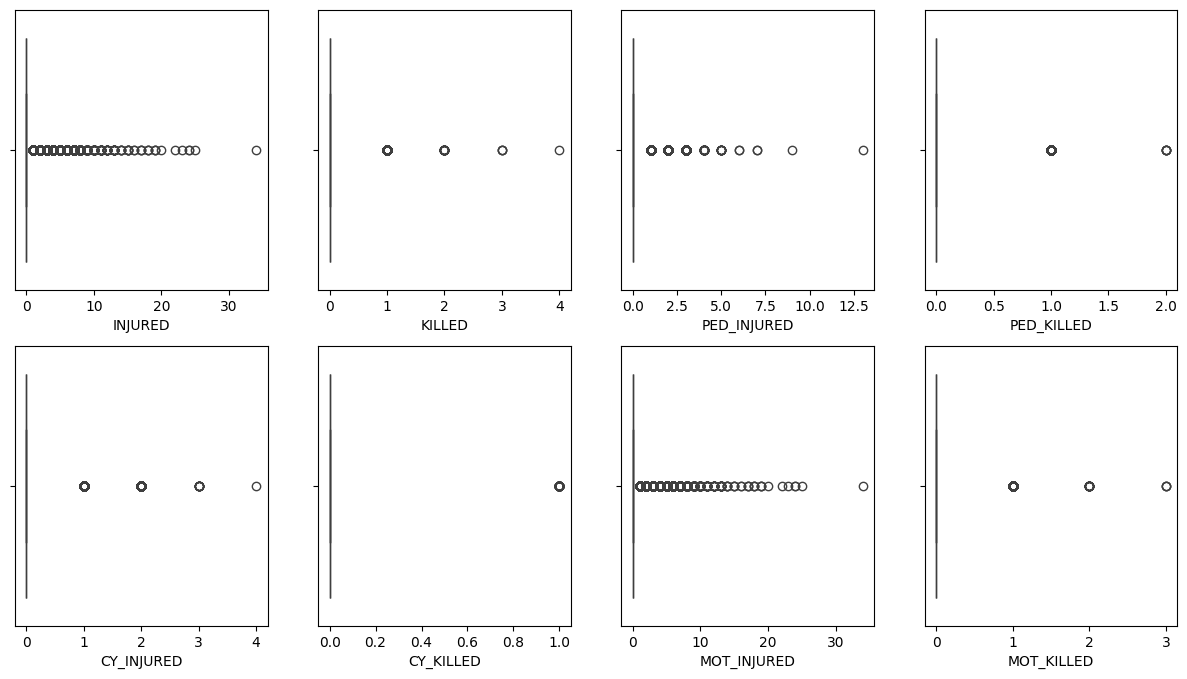

In [15]:
numerical_columns = df_sample.select_dtypes(include='number').columns.tolist()

img, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_sample[column], ax=axs[i//4, i%4])

plt.show()

#### Filling missing values with their mode and mean for categorical and numerical values respectively

In [16]:
# filling all categorical missing values with their mode
categorical_columns = df_sample.select_dtypes(include='object').columns.tolist()

for column in categorical_columns:
    df_sample.fillna({column: df_sample[column].mode()[0]}, inplace=True)

# filling numberical missing values with its mean
numerical_columns = df_sample.select_dtypes(include='number').columns.tolist()

for column in numerical_columns:
    df_sample.fillna({column: df_sample[column].mean()}, inplace=True)


In [17]:
df_sample.isnull().sum()

DATE           0
TIME           0
BOROUGH        0
ON_STREET      0
INJURED        0
KILLED         0
PED_INJURED    0
PED_KILLED     0
CY_INJURED     0
CY_KILLED      0
MOT_INJURED    0
MOT_KILLED     0
FACTOR         0
VEHICLE        0
dtype: int64

### Parsing categorical colums to numeric representation

Based on that most of the categorical columns have many categories One-Hot enconding is not suitable therefore Label Encoding would be a better solution

In [18]:
df_sample.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
INJURED        float64
KILLED         float64
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = df_sample[['BOROUGH', 'ON_STREET', 'FACTOR', 'VEHICLE']].columns.tolist()

for column in categorical_columns:
    df_sample[column] = label_encoder.fit_transform(df_sample[column])


Creating new column with month and time instead of date and time

In [28]:
# converting the date and time columns to datetime
df_sample['MONTH'] = df_sample['DATE'].apply(lambda x: int(x.split('/')[0]))
df_sample['TIME'] = df_sample['TIME'].apply(lambda x: float(x.replace(':', '.')))

df_sample.drop('DATE', axis=1, inplace=True)


KeyError: 'DATE'

In [29]:
df_sample[['MONTH', 'TIME']].head()

,MONTH,TIME
COLLISION_ID,,
4477506,10,11.0
3674076,5,13.0
3121392,7,15.3
4446136,8,17.0
237015,10,13.4


Normalizing the data

## Training and model selection

#### Spliting sets

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_sample.drop('VEHICLE', axis=1)
y = df_sample['VEHICLE']

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

splits = [20, 25, 30]
knn_cv_scores = []
dt_cv_scores = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split/100, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3)
    dt = DecisionTreeClassifier(random_state=42, max_depth=15)

    knn_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')

    knn_cv_scores.append(knn_scores.mean())
    dt_cv_scores.append(dt_scores.mean())

knn_best_split = splits[np.argmax(knn_cv_scores)]
knn_best_score = np.max(knn_cv_scores)

print(f"Best test_size split for KNN: {splits[np.argmax(knn_cv_scores)]}%")
print(f"Best cross-validation score for KNN: {np.max(knn_cv_scores)}\n")

print(f"Best test_size split for Decision Tree: {splits[np.argmax(dt_cv_scores)]}%")
print(f"Best cross-validation score for Decision Tree: {np.max(dt_cv_scores)}")


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/

Best test_size split for KNN: 20%
Best cross-validation score for KNN: 0.23757031703026293

Best test_size split for Decision Tree: 20%
Best cross-validation score for Decision Tree: 0.34382190292611026


## References

- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
- https://www.linkedin.com/pulse/title-label-encoding-one-hot-data-preprocessing-shivani-singh
- https://www.linkedin.com/pulse/top-6-machine-learning-algorithms-classification-jagrat-patel/